# **Mounting Google drive for importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing Packages**

In [ ]:
!pip install opencv-python

# **Import Librararies**

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# **Load the dataset**

In [ ]:

  def load_dataset(data_dir, target_size=(150, 150)):
    images = []
    labels = []

    skin_conditions = ['wrinkles', 'puffy eyes', 'Pores', 'oily', 'normal', 'dry', 'dark spots', 'Blackheads']

    for condition_index, condition in enumerate(skin_conditions):
        condition_dir = os.path.join(data_dir, condition)
        for image_file in os.listdir(condition_dir):
            image_path = os.path.join(condition_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load images with correct depth
            if image is not None:
                image = cv2.resize(image, target_size)
                image = cv2.convertScaleAbs(image)  # Convert to 8-bit unsigned integers
                images.append(image)
                # Initialize label array for each image
                label = np.zeros(len(skin_conditions), dtype=np.int32)
                # Set the label of the current condition to 1
                label[condition_index] = 1
                labels.append(label)
            else:
                print(f"Error loading image: {image_path}")

    return np.array(images), np.array(labels)

data_dir = "//content/drive/MyDrive/MultiLabel_Skin_Type_Detection/train"
images, labels = load_dataset(data_dir)


# **Displaying images**

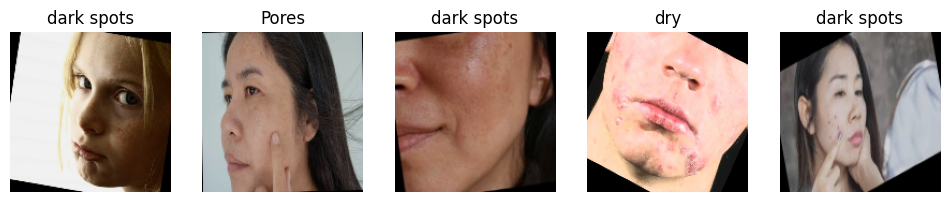

In [ ]:
num_images_to_display = 5  # Number of images to display
skin_conditions = ['wrinkles', 'puffy eyes', 'Pores', 'oily', 'normal', 'dry', 'dark spots', 'Blackheads', 'Acne']

# Randomly select num_images_to_display images
selected_indices = np.random.choice(len(images), num_images_to_display, replace=False)

# Plot the images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(selected_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    label_index = np.argmax(labels[idx])  # Get the index of the label
    plt.title(skin_conditions[label_index])  # Display the corresponding skin condition as title
    plt.axis('off')
plt.show()

# **Split the dataset into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=32)

# ***Define and train the CNN model using TensorFlow***

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Additional Convolutional Layer
    MaxPooling2D(2, 2),  # Additional MaxPooling Layer
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Additional Dense layer
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(8, activation='sigmoid')  # 8 output neurons for 8 skin conditions, sigmoid activation for multilabel classification
])



# **Compiling the model**

In [ ]:


# Compile the model with the new optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **Training the model**


In [ ]:
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/15
368/368 [==============================] - 615s 2s/step - loss: 0.8739 - accuracy: 0.2818 - val_loss: 0.6415 - val_accuracy: 0.2672
Epoch 2/15
368/368 [==============================] - 615s 2s/step - loss: 0.5115 - accuracy: 0.4049 - val_loss: 0.4222 - val_accuracy: 0.4735
Epoch 3/15
368/368 [==============================] - 640s 2s/step - loss: 0.3806 - accuracy: 0.4768 - val_loss: 0.3306 - val_accuracy: 0.5044
Epoch 4/15
368/368 [==============================] - 592s 2s/step - loss: 0.3091 - accuracy: 0.5320 - val_loss: 0.3067 - val_accuracy: 0.4922
Epoch 5/15
368/368 [==============================] - 591s 2s/step - loss: 0.2803 - accuracy: 0.5465 - val_loss: 0.2829 - val_accuracy: 0.5133
Epoch 6/15
368/368 [==============================] - 588s 2s/step - loss: 0.2590 - accuracy: 0.5691 - val_loss: 0.2557 - val_accuracy: 0.5562
Epoch 7/15
368/368 [==============================] - 589s 2s/step - loss: 0.2387 - accuracy: 0.5912 - val_loss: 0.2604 - val_accuracy: 0.5514

# **Plotting the loss and Accuracy curve**

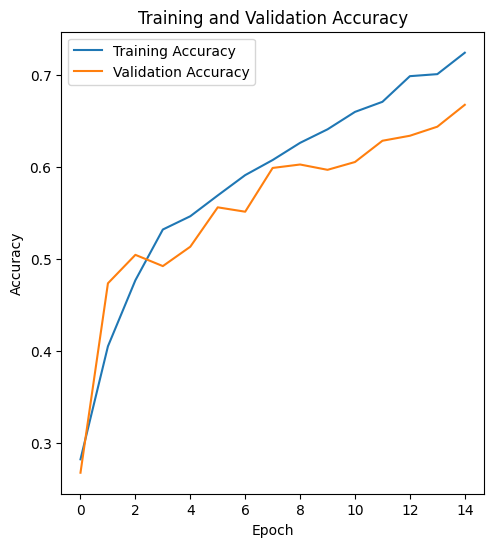

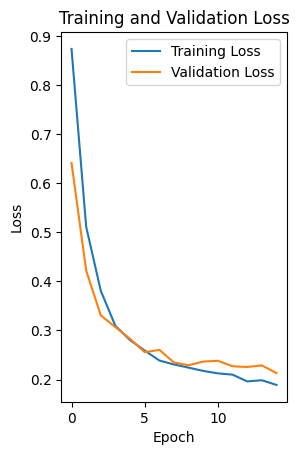

In [ ]:
history = model.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.subplot(1, 2, 2)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Display the summary of the model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# **Predict skin type for a new image**

In [ ]:
# @title
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define skin types
skin_types = {'oily': 0, 'dry': 1, 'normal': 2}

# Define skin attributes
skin_attributes = {'Blackheads': 0, 'puffy eyes': 1, 'dark spots': 2, 'Pores': 3, 'wrinkles': 4}

def predict_skin_type_and_attributes(image, model, threshold=0.25):
    # Predict skin type and attributes
    prediction = model.predict(np.expand_dims(image, axis=0))[0]

    # Extract skin type prediction
    skin_type_prediction = 'normal'  # Default to normal if not predicted
    max_skin_type_prob = 0.0
    for skin_type, index in skin_types.items():
        if prediction[index] > max_skin_type_prob:
            skin_type_prediction = skin_type
            max_skin_type_prob = prediction[index]

    # Extract skin attributes
    predicted_attributes = []
    for attribute, index in skin_attributes.items():
        if prediction[index] > threshold:
            predicted_attributes.append(attribute)

    return skin_type_prediction, predicted_attributes

def plot_predictions(test_images, model):
    plt.figure(figsize=(15, 5))
    num_images = len(test_images)
    for i, image in enumerate(test_images, 1):
        plt.subplot(1, num_images, i)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image " + str(i))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Predict and plot for each image
    for i, image in enumerate(test_images, 1):
        skin_type, skin_attributes = predict_skin_type_and_attributes(image, model)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Predicted Skin Type: " + skin_type + "\nPredicted Attributes: " + ", ".join(skin_attributes))
        plt.axis('off')
        plt.show()

# Example usage:
# Assuming 'model' is your trained model and 'test_images' is a list of test images
plot_predictions(test_images, model)
